In [8]:
import pandas as pd
import numpy as np

from collections import Counter


from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import euclidean

from sklearn.cluster import DBSCAN

%matplotlib inline
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv('data_1024.csv', sep='\t', index_col='Driver_ID')

In [3]:
data.columns

Index(['Distance_Feature', 'Speeding_Feature'], dtype='object')

In [4]:
data.head()

,Distance_Feature,Speeding_Feature
Driver_ID,,
3423311935,71.24,28.0
3423313212,52.53,25.0
3423313724,64.54,27.0
3423311373,55.69,22.0
3423310999,54.58,25.0


### Fazer clusterização hierárquica (HC) usando os seguintes métodos e mostrando os dendrogramas para:
#### Single

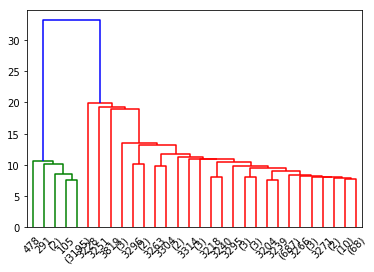

In [9]:
hc_single = linkage(data, method="single")
dendrogram(hc_single, truncate_mode='lastp')
plt.show()

#### Complete

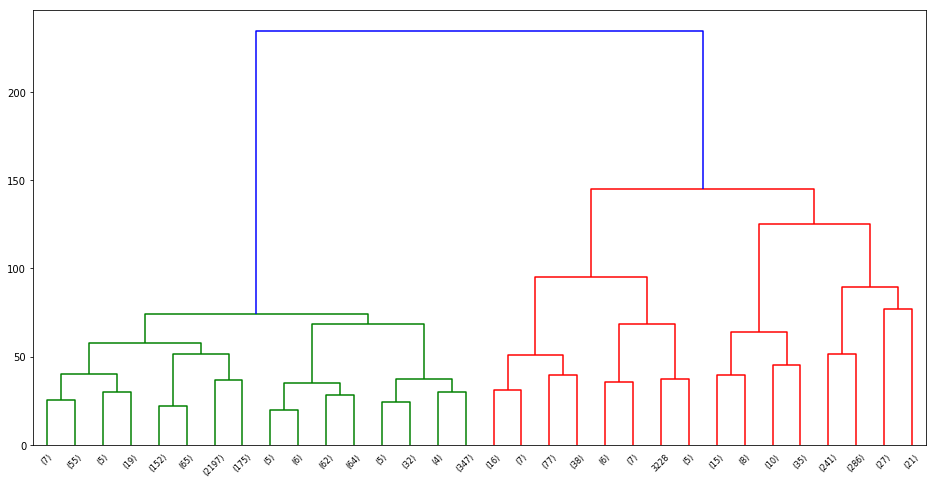

In [16]:
plt.figure(figsize=(16,8))
hc_complete = linkage(data, method="complete")
dendrogram(hc_complete, truncate_mode='level', p=4)
plt.show()

#### Average

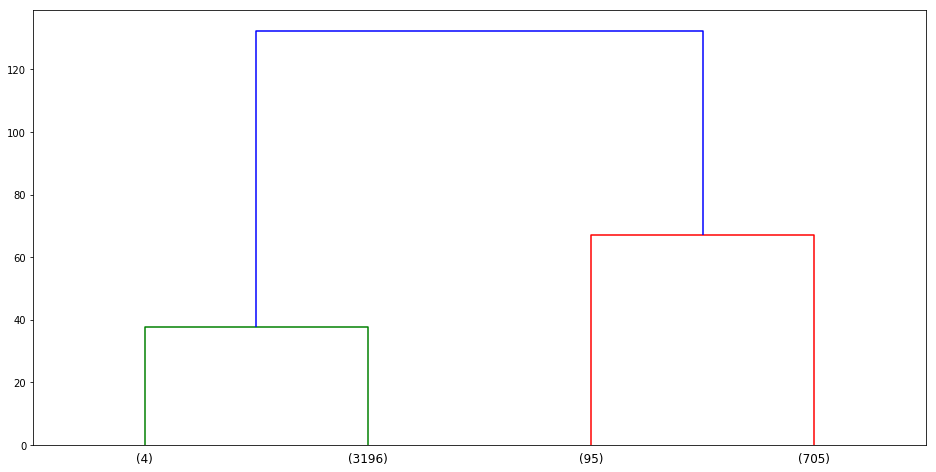

In [23]:
plt.figure(figsize=(16,8))
hc_average = linkage(data, method="average")
dendrogram(hc_average, truncate_mode='level', p=1)
plt.show()

### Escolher uma clusterização hierárquica do item 1 e, a partir dela, escolher uma linha de corte e mostrar os clusters no gráfico.

In [24]:
np.unique(cut_tree(hc_average, n_clusters=4), return_counts=True)

(array([0, 1, 2, 3]), array([3200,   95,  704,    1]))

### Fazer clusterização DBSCAN com diferentes valores de eps e minPoints.

In [76]:
_eps = [5,10,15]
_min_samples = [5,10,15,20]

X = data.values

for _eps_ in _eps:
    for _min_samples_ in _min_samples:
        # Compute DBSCAN
        db = DBSCAN(eps=_eps_, min_samples=_min_samples_).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

        print('número de clusters {},\nmin_points: {},\neps: {}\n'.format(n_clusters_, _min_samples_, _eps_))

número de clusters 7,
min_points: 5,
eps: 5

número de clusters 2,
min_points: 10,
eps: 5

número de clusters 2,
min_points: 15,
eps: 5

número de clusters 3,
min_points: 20,
eps: 5

número de clusters 3,
min_points: 5,
eps: 10

número de clusters 3,
min_points: 10,
eps: 10

número de clusters 3,
min_points: 15,
eps: 10

número de clusters 2,
min_points: 20,
eps: 10

número de clusters 2,
min_points: 5,
eps: 15

número de clusters 2,
min_points: 10,
eps: 15

número de clusters 3,
min_points: 15,
eps: 15

número de clusters 3,
min_points: 20,
eps: 15



Estimated number of clusters: 2


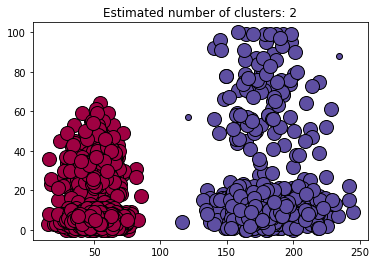

In [29]:
X = data.values
# Compute DBSCAN
db = DBSCAN(eps=25, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # White used for noise.
        col = [1, 1, 1, 0]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Quais as diferenças entre feature selection e feature extraction? 
* feature selection: Onde se seleciona um subdataset do dataset original
* feature extraction: Onde se gera um novo dataset apartir do original

### Dê exemplos de técnicas usadas para feature selection.
- feature importances das arvores de decisão, onde se elimina features com pouca importância
- descobrir a correlação entre features, e eliminar features com baixa correlação com y, e eliminar features com altar correlação entre si.

### Dê exemplos de técnicas usadas para feature extraction. 
- LDA
- PCA